In [439]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [440]:
df = pd.read_csv('DATASET.csv')

C:\Users\macka\AppData\Local\Temp\ipykernel_29360\1563159184.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('DATASET.csv')


In [441]:
df.head()

,Year,Jurisdiction,Category,Type,Classification,Total type,Stream,Management,Fate,Tonnes,Core or non-core,Sub-stream,Cat. order,Cat. no.,Type order,Type no.,
0,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,C&I,Other disposal,Disposal,"20,186",Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
1,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,C&I,Recycling,Recycling,0,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
2,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,Total,Other disposal,Disposal,"20,186",Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN
3,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,Total,Recycling,Recycling,0,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN
4,2020-2021,ACT,Biosolids,NaN,Category,NaN,C&I,Other disposal,Disposal,"20,186",Core waste,03 C&I core,03 Organics,C3,NaN,NaN,NaN


In [442]:
df.shape

(71496, 17)

In [443]:
df = df.drop_duplicates()

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71424 entries, 0 to 71495
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              71424 non-null  object
 1   Jurisdiction      71424 non-null  object
 2   Category          71424 non-null  object
 3   Type              54156 non-null  object
 4   Classification    71424 non-null  object
 5   Total type        4901 non-null   object
 6   Stream            71424 non-null  object
 7   Management        71424 non-null  object
 8   Fate              71424 non-null  object
 9   Tonnes            71424 non-null  object
 10  Core or non-core  71424 non-null  object
 11  Sub-stream        71424 non-null  object
 12  Cat. order        71424 non-null  object
 13  Cat. no.          71424 non-null  object
 14  Type order        54162 non-null  object
 15  Type no.          54162 non-null  object
 16                    8608 non-null   object
dtypes: object(17

In [445]:
unique_categories = df['Category'].unique()
unique_types = df['Type'].unique()
unique_years = df['Year'].unique()

In [446]:
df = df.drop('Total type', axis=1)

In [447]:
df['Tonnes'] = df['Tonnes'].str.replace(',', '')
df['Tonnes'] = df['Tonnes'].astype(int)

In [448]:
df_aus = df
df = df[df['Jurisdiction'] != 'Australia']

In [449]:
agg_sum = df.groupby(['Jurisdiction'])['Tonnes'].sum()
agg_sum

Jurisdiction
ACT      51689966
NSW    2116305322
NT      298870967
Qld    1507767236
SA      649713662
Tas      89015273
Vic    1090419793
WA     2974201365
Name: Tonnes, dtype: int64

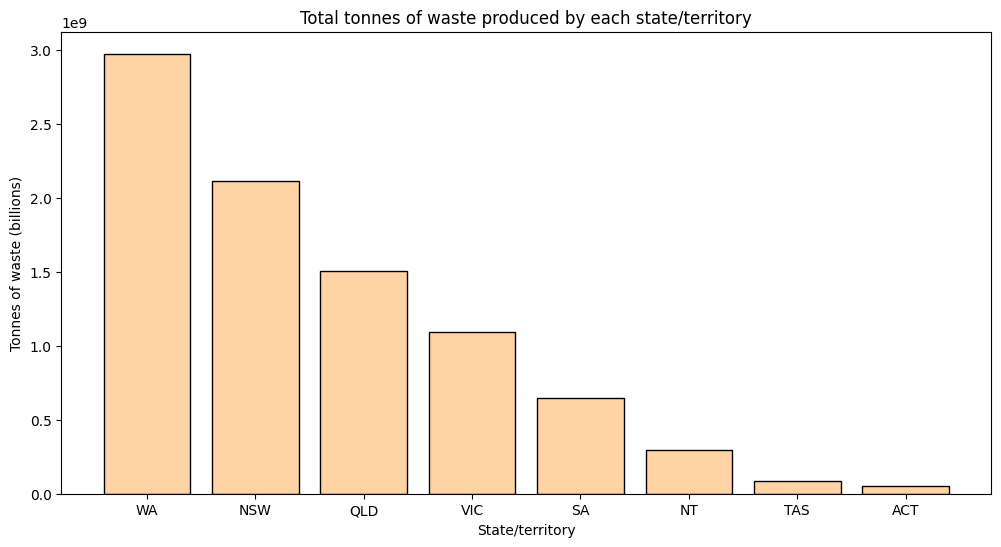

In [450]:
state_tonne_sums = []
state_names = ['WA', 'NSW', 'QLD', 'VIC', 'SA', 'NT', 'TAS', 'ACT']

for i in range(len(agg_sum)):
    state_tonne_sums.append(agg_sum[i])

state_tonne_sums.sort(reverse = True)
plt.figure(figsize=(12, 6))
plt.bar(state_names, state_tonne_sums, color = '#FFD3A3', edgecolor='black', linewidth=1)
plt.xlabel("State/territory")
plt.ylabel("Tonnes of waste (billions)")
plt.title("Total tonnes of waste produced by each state/territory")
plt.show()

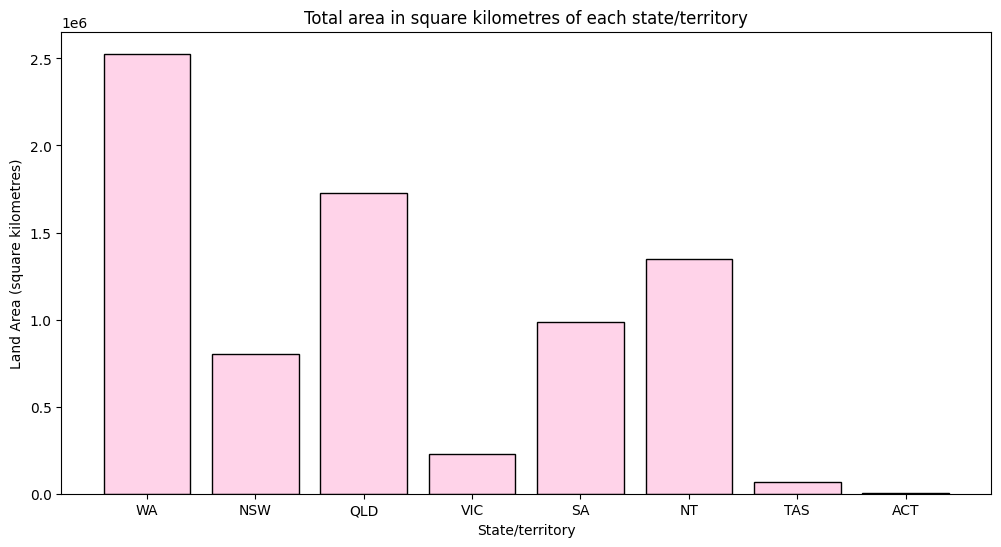

In [451]:
state_areas = [2527013, 801150, 1729742, 227444, 984321, 1347791, 68401, 2358]
plt.figure(figsize=(12, 6))
plt.bar(state_names, state_areas, color = '#FFD3E9', edgecolor='black', linewidth=1)
plt.xlabel("State/territory")
plt.ylabel("Land Area (square kilometres)")
plt.title("Total area in square kilometres of each state/territory")
plt.show()

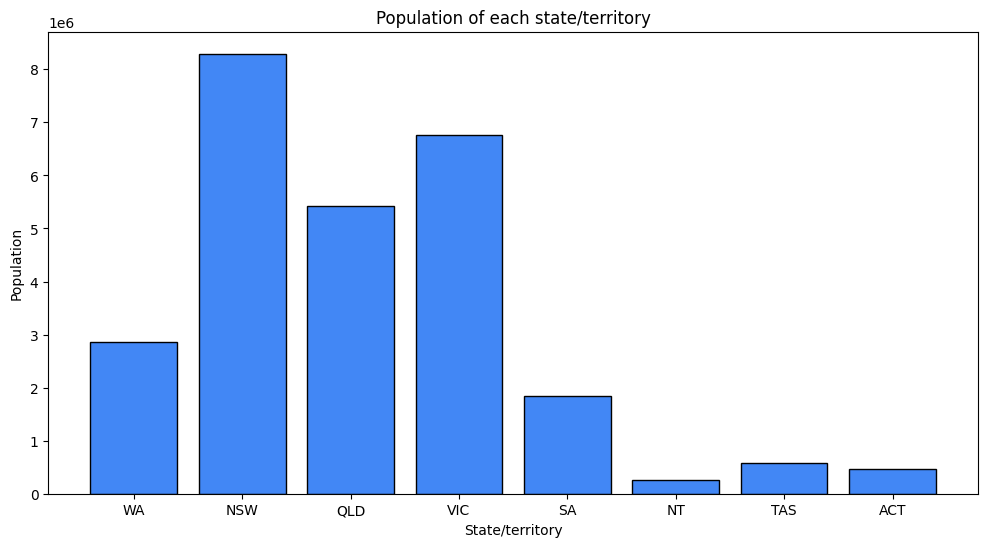

In [452]:
state_populations = [2855600, 8294000, 5418500, 6766600, 1844600, 251700, 572700, 464600]
plt.figure(figsize=(12, 6))
plt.bar(state_names, state_populations, color = '#4287f5', edgecolor='black', linewidth=1)
plt.xlabel("State/territory")
plt.ylabel("Population")
plt.title("Population of each state/territory")
plt.show()

In [453]:
import statistics
mean_area = statistics.mean(state_areas)
std_dev_area = statistics.stdev(state_areas)

mean_pop = statistics.mean(state_populations)
std_dev_pop = statistics.stdev(state_populations)

state_area_normal = []
for i in range(len(state_areas)):
    state_area_normal.append((state_areas[i]-mean_area)/std_dev_area)
state_area_normal

state_pop_normal = []
for i in range(len(state_populations)):
    state_pop_normal.append((state_populations[i]-mean_pop)/std_dev_pop)
state_pop_normal

states_areas_plus_pop = []
for i in range(len(state_areas)):
    states_areas_plus_pop.append(state_area_normal[i] + state_pop_normal[i])
states_areas_plus_pop

[1.6262799827636463,
 1.4125452235423441,
 1.5437172419402976,
 0.2755587285334784,
 -0.44153188664585113,
 -0.539560311781945,
 -1.8838846609482958,
 -1.9931243174036744]

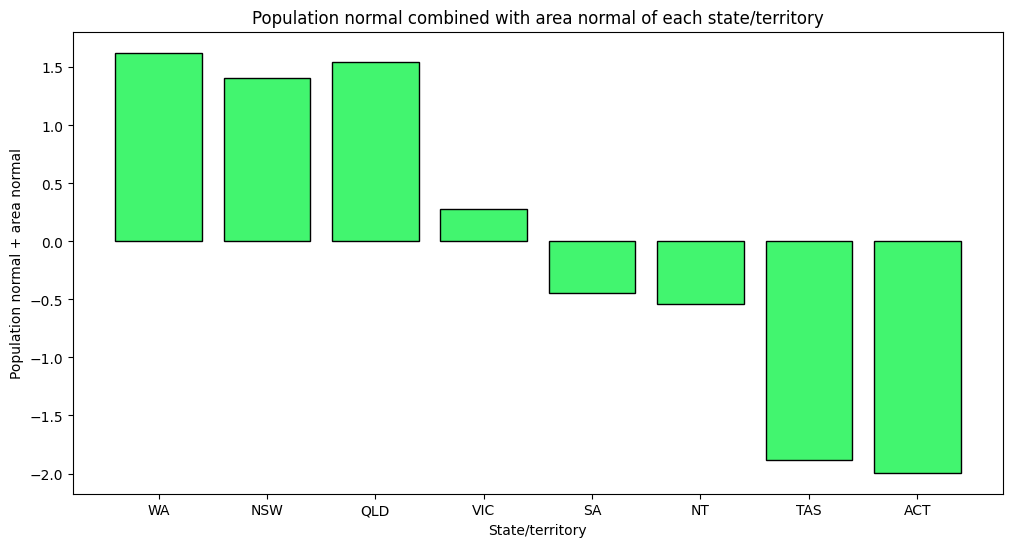

In [454]:
plt.figure(figsize=(12, 6))
plt.bar(state_names, states_areas_plus_pop, color = '#42f56f', edgecolor='black', linewidth=1)
plt.xlabel("State/territory")
plt.ylabel("Population normal + area normal")
plt.title("Population normal combined with area normal of each state/territory")
plt.show()

In [455]:
df_australia = df[df['Jurisdiction'] == 'Australia']
state_counts = df['Jurisdiction'].value_counts()
print("Number of entries for each state/territory")
state_counts

Number of entries for each state/territory


SA     9589
WA     9375
Vic    9114
ACT    8813
NSW    8807
Qld    8602
Tas    8426
NT     8366
Name: Jurisdiction, dtype: int64

In [456]:
yearly_groups = df.groupby(['Year'])['Tonnes'].sum()

In [457]:
yearly_groups

Year
2006-2007     320294231
2007-2008      34228904
2008-2009     329572918
2009-2010     334300181
2010-2011     332293640
2011-2012      31631979
2012-2013      35502939
2013-2014     335826397
2014-2015     353673768
2015-2016     364789916
2016-2017     379442636
2017-2018     409381478
2018-2019    2193646624
2019-2020     417288109
2020-2021    2906109864
Name: Tonnes, dtype: int64

In [458]:
unique_years

array(['2020-2021', '2019-2020', '2018-2019', '2017-2018', '2016-2017',
       '2015-2016', '2014-2015', '2013-2014', '2012-2013', '2011-2012',
       '2010-2011', '2009-2010', '2008-2009', '2007-2008', '2006-2007'],
      dtype=object)

In [459]:
# plt.plot(x, y, label='My Line')
# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')
# plt.title('Line Graph Example')
# plt.legend()
unique_years = unique_years[::-1]

In [460]:
unique_years

array(['2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011',
       '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016',
       '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021'],
      dtype=object)

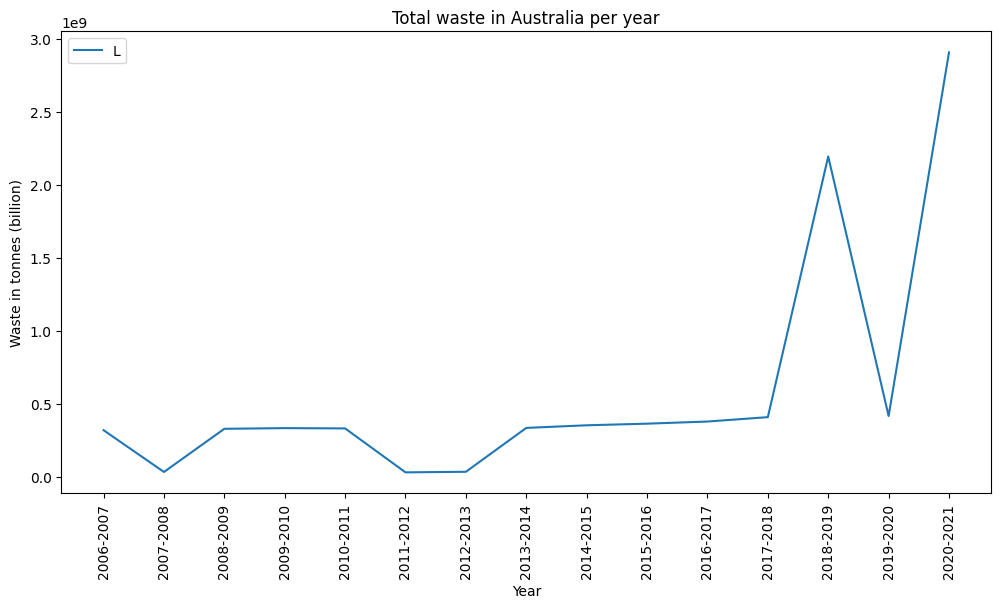

In [461]:
plt.figure(figsize=(12, 6))
plt.plot(unique_years, yearly_groups, label='My Line')
plt.xlabel('Year')
plt.ylabel('Waste in tonnes (billion)')
plt.title('Total waste in Australia per year')
plt.xticks(rotation=90)
plt.legend('Line')

In [462]:
category_groups = df.groupby(['Category'])['Tonnes'].sum()
unique_categories

array(['Biosolids', 'Building and demolition materials', 'Glass',
       'Hazardous wastes', 'Metals', 'Mining', 'Organics',
       'Paper & cardboard', 'Plastics',
       'Textiles, leather & rubber (excl. tyres)', 'Total',
       'Unclassified materials', 'Mineral processing',
       'Organic primary production', 'Organic processing', 'Ash'],
      dtype=object)

In [463]:
unique_categories[-2]

'Organic processing'

In [464]:
category_groups

Category
Ash                                          923155446
Biosolids                                    108914856
Building and demolition materials            692456933
Glass                                         43932041
Hazardous wastes                             540888999
Metals                                       195587544
Mining                                      4256571706
Organics                                     569575155
Paper & cardboard                            167226620
Plastics                                      64225627
Textiles, leather & rubber (excl. tyres)      22373302
Total                                       1159237420
Unclassified materials                        33837935
Name: Tonnes, dtype: int64

In [465]:
unique_categories = np.delete(unique_categories, [-2,-3,-4])

In [466]:
unique_categories = np.sort(unique_categories)

In [467]:
unique_categories

array(['Ash', 'Biosolids', 'Building and demolition materials', 'Glass',
       'Hazardous wastes', 'Metals', 'Mining', 'Organics',
       'Paper & cardboard', 'Plastics',
       'Textiles, leather & rubber (excl. tyres)', 'Total',
       'Unclassified materials'], dtype=object)

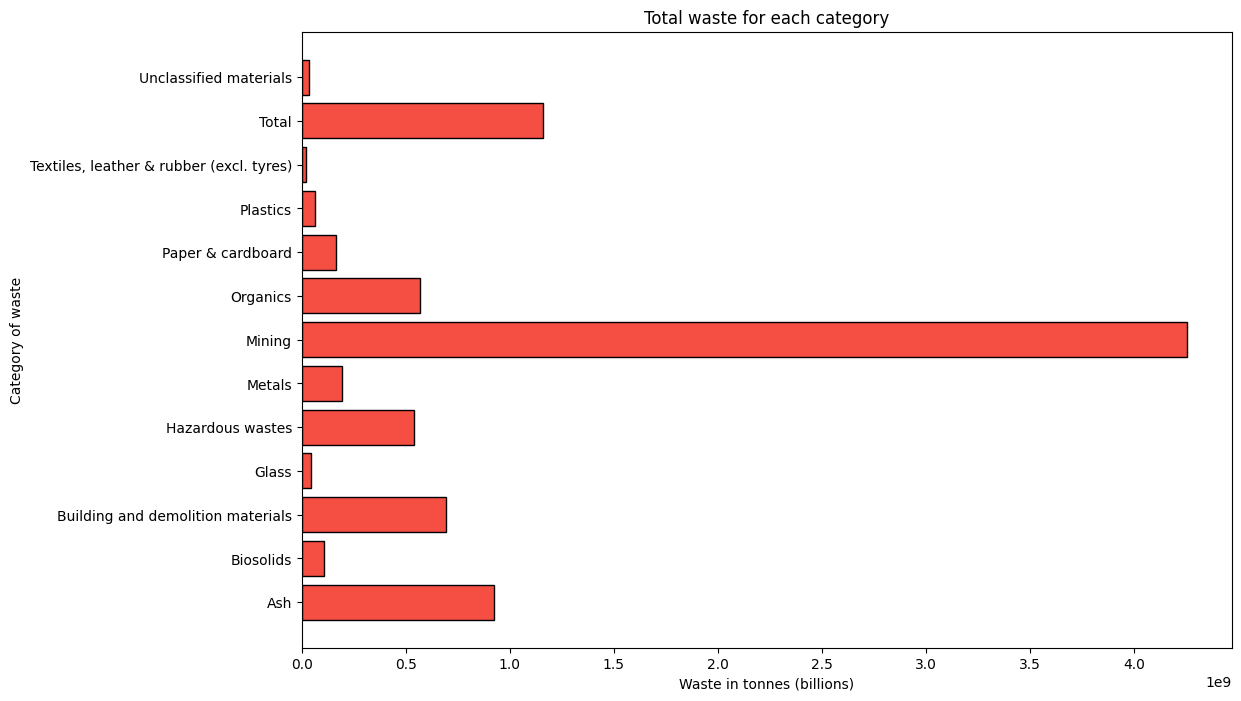

In [468]:
plt.figure(figsize=(12, 8))
plt.barh(unique_categories, category_groups, color = '#f54e42', edgecolor='black', linewidth=1)
plt.xlabel("Waste in tonnes (billions)")
plt.ylabel("Category of waste")
plt.title("Total waste for each category")
plt.show()

In [469]:
df.head()

,Year,Jurisdiction,Category,Type,Classification,Stream,Management,Fate,Tonnes,Core or non-core,Sub-stream,Cat. order,Cat. no.,Type order,Type no.,
0,2020-2021,ACT,Biosolids,Biosolids,Type,C&I,Other disposal,Disposal,20186,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
1,2020-2021,ACT,Biosolids,Biosolids,Type,C&I,Recycling,Recycling,0,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
2,2020-2021,ACT,Biosolids,Biosolids,Type,Total,Other disposal,Disposal,20186,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN
3,2020-2021,ACT,Biosolids,Biosolids,Type,Total,Recycling,Recycling,0,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN
4,2020-2021,ACT,Biosolids,NaN,Category,C&I,Other disposal,Disposal,20186,Core waste,03 C&I core,03 Organics,C3,NaN,NaN,NaN


In [470]:
waste_fate_totals = df.groupby(['Fate'])['Tonnes'].sum()
waste_fate_totals = waste_fate_totals.sort_values(ascending = False)
waste_fate_totals

Fate
Disposal             5580445835
Recycling            2486225379
Long-term storage     534786270
Energy recovery       153107630
Waste reuse            23331226
Unknown                   87244
Name: Tonnes, dtype: int64

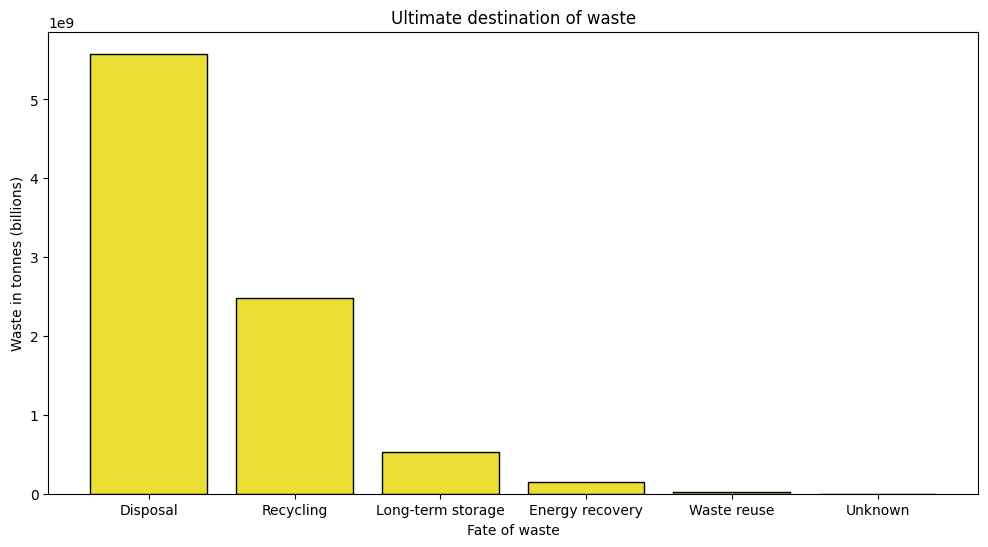

In [471]:
fates = ['Disposal', 'Recycling', 'Long-term storage', 'Energy recovery', 'Waste reuse', 'Unknown']
plt.figure(figsize=(12, 6))
plt.bar(fates, waste_fate_totals, color = '#ebde34', edgecolor='black', linewidth=1)
plt.xlabel("Fate of waste")
plt.ylabel("Waste in tonnes (billions)")
plt.title("Ultimate destination of waste")
plt.show()

In [472]:
cross_tab = pd.crosstab(df['Tonnes'], df['Jurisdiction'])
cross_tab
#this can be done with whatever 2 variables you desire

Jurisdiction,ACT,NSW,NT,Qld,SA,Tas,Vic,WA
Tonnes,,,,,,,,
0,5201,4402,4486,3897,5008,4466,4030,4740
1,246,36,186,23,51,309,87,51
2,128,24,152,6,22,93,52,39
3,110,18,126,8,43,70,14,31
4,48,10,55,14,23,86,21,18
...,...,...,...,...,...,...,...,...
79445648,0,4,0,0,0,0,0,0
81749243,0,0,0,4,0,0,0,0
259200155,0,0,0,0,0,0,0,3


In [473]:
df

,Year,Jurisdiction,Category,Type,Classification,Stream,Management,Fate,Tonnes,Core or non-core,Sub-stream,Cat. order,Cat. no.,Type order,Type no.,
0,2020-2021,ACT,Biosolids,Biosolids,Type,C&I,Other disposal,Disposal,20186,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
1,2020-2021,ACT,Biosolids,Biosolids,Type,C&I,Recycling,Recycling,0,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
2,2020-2021,ACT,Biosolids,Biosolids,Type,Total,Other disposal,Disposal,20186,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN
3,2020-2021,ACT,Biosolids,Biosolids,Type,Total,Recycling,Recycling,0,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN
4,2020-2021,ACT,Biosolids,NaN,Category,C&I,Other disposal,Disposal,20186,Core waste,03 C&I core,03 Organics,C3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71491,2006-2007,WA,Unclassified materials,NaN,Category,MSW,Recycling,Recycling,0,Core waste,01 MSW,10 Unclassified materials,C10,NaN,NaN,NaN
71492,2006-2007,WA,Unclassified materials,NaN,Category,Total,Energy from waste facility,Energy recovery,0,Core waste,09 Total,10 Unclassified materials,C10,NaN,NaN,NaN
71493,2006-2007,WA,Unclassified materials,NaN,Category,Total,Landfill,Disposal,0,Core waste,09 Total,10 Unclassified materials,C10,NaN,NaN,NaN
71494,2006-2007,WA,Unclassified materials,NaN,Category,Total,Landfill,Energy recovery,0,Core waste,09 Total,10 Unclassified materials,C10,NaN,NaN,NaN


In [474]:
column_names = df.columns.tolist()
column_names

['Year',
 'Jurisdiction',
 'Category',
 'Type',
 'Classification',
 'Stream',
 'Management',
 'Fate',
 'Tonnes',
 'Core or non-core',
 'Sub-stream',
 'Cat. order',
 'Cat. no.',
 'Type order',
 'Type no.',
 ' ']

In [475]:
df_without = df[~df['Year'].isin(['2007-2008', '2011-2012', '2012-2013'])]
df_without

,Year,Jurisdiction,Category,Type,Classification,Stream,Management,Fate,Tonnes,Core or non-core,Sub-stream,Cat. order,Cat. no.,Type order,Type no.,
0,2020-2021,ACT,Biosolids,Biosolids,Type,C&I,Other disposal,Disposal,20186,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
1,2020-2021,ACT,Biosolids,Biosolids,Type,C&I,Recycling,Recycling,0,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
2,2020-2021,ACT,Biosolids,Biosolids,Type,Total,Other disposal,Disposal,20186,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN
3,2020-2021,ACT,Biosolids,Biosolids,Type,Total,Recycling,Recycling,0,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN
4,2020-2021,ACT,Biosolids,NaN,Category,C&I,Other disposal,Disposal,20186,Core waste,03 C&I core,03 Organics,C3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71491,2006-2007,WA,Unclassified materials,NaN,Category,MSW,Recycling,Recycling,0,Core waste,01 MSW,10 Unclassified materials,C10,NaN,NaN,NaN
71492,2006-2007,WA,Unclassified materials,NaN,Category,Total,Energy from waste facility,Energy recovery,0,Core waste,09 Total,10 Unclassified materials,C10,NaN,NaN,NaN
71493,2006-2007,WA,Unclassified materials,NaN,Category,Total,Landfill,Disposal,0,Core waste,09 Total,10 Unclassified materials,C10,NaN,NaN,NaN
71494,2006-2007,WA,Unclassified materials,NaN,Category,Total,Landfill,Energy recovery,0,Core waste,09 Total,10 Unclassified materials,C10,NaN,NaN,NaN


In [476]:
yearly_groups_dis = df[df['Fate'] == 'Disposal'].groupby(['Year'])['Tonnes'].sum()[:-3]
yearly_groups_rec = df[df['Fate'] == 'Recycling'].groupby(['Year'])['Tonnes'].sum()[:-3]
yearly_groups_rec

Year
2006-2007    141628262
2007-2008     11279415
2008-2009    142961208
2009-2010    155979548
2010-2011    173672416
2011-2012     13896936
2012-2013     15389877
2013-2014    184321056
2014-2015    198807920
2015-2016    208261689
2016-2017    224430419
2017-2018    251775170
Name: Tonnes, dtype: int32

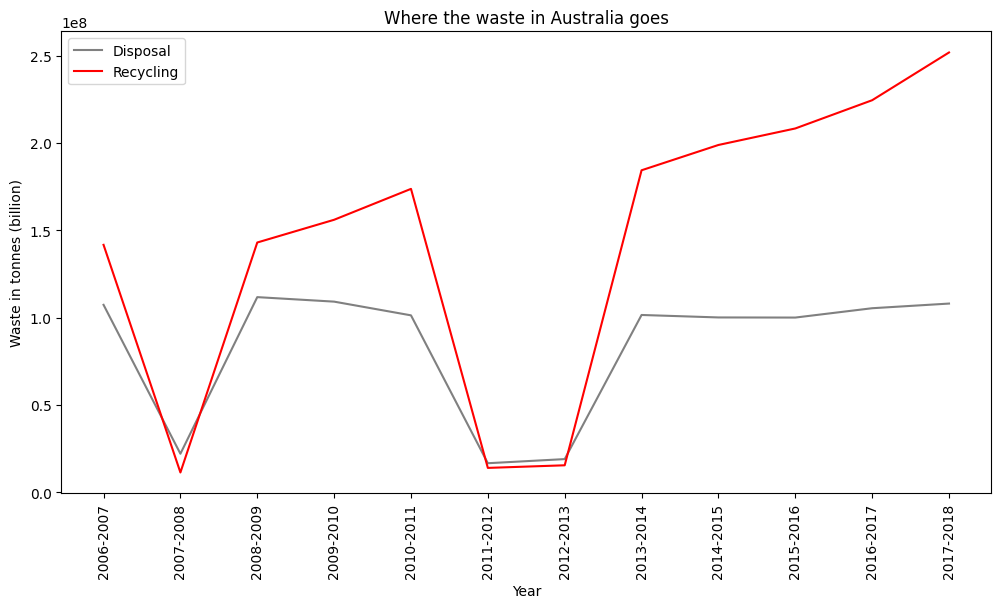

In [477]:
plt.figure(figsize=(12, 6))
plt.plot(unique_years[:-3], yearly_groups_dis, color = 'grey', label='Disposal')
plt.plot(unique_years[:-3], yearly_groups_rec, color = 'red',  label='Recycling')
plt.xlabel('Year')
plt.ylabel('Waste in tonnes (billion)')
plt.title('Where the waste in Australia goes')
plt.xticks(rotation=90)
plt.legend()

In [478]:
year_counts = df['Year'].value_counts()
print("Number of entries for each year")
year_counts

Number of entries for each year


2020-2021    5886
2019-2020    5766
2018-2019    5211
2017-2018    5075
2016-2017    5034
2014-2015    5029
2013-2014    4988
2015-2016    4972
2006-2007    4969
2009-2010    4967
2008-2009    4967
2010-2011    4964
2012-2013    3088
2011-2012    3088
2007-2008    3088
Name: Year, dtype: int64

In [479]:
year_2007 = df[df['Year'] == '2007-2008']
state_counts_2007 = year_2007['Jurisdiction'].value_counts()
print("Number of entries for each state in 2007-2008")
state_counts_2007

Number of entries for each state in 2007-2008


ACT    386
NSW    386
NT     386
Qld    386
SA     386
Tas    386
Vic    386
WA     386
Name: Jurisdiction, dtype: int64

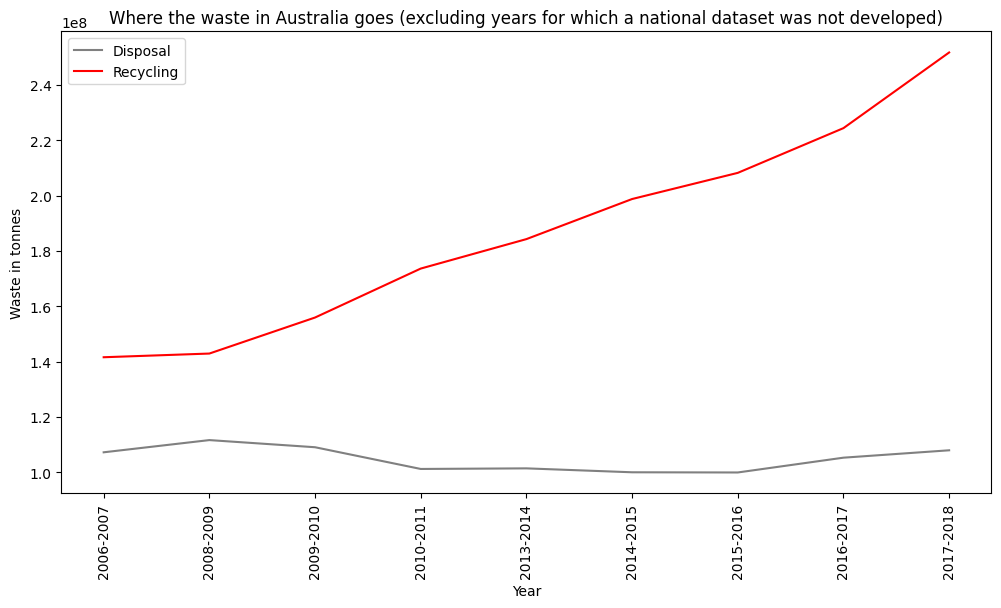

In [480]:
yearly_groups_dis = df_without[df_without['Fate'] == 'Disposal'].groupby(['Year'])['Tonnes'].sum()[:-3]
yearly_groups_rec = df_without[df_without['Fate'] == 'Recycling'].groupby(['Year'])['Tonnes'].sum()[:-3]
unique_years_ex = ['2006-2007', '2008-2009', '2009-2010', '2010-2011', '2013-2014', '2014-2015', '2015-2016',
       '2016-2017', '2017-2018']

plt.figure(figsize=(12, 6))
plt.plot(unique_years_ex, yearly_groups_dis, color = 'grey', label='Disposal')
plt.plot(unique_years_ex, yearly_groups_rec, color = 'red',  label='Recycling')
plt.xlabel('Year')
plt.ylabel('Waste in tonnes')
plt.title('Where the waste in Australia goes (excluding years for which a national dataset was not developed)')
plt.xticks(rotation=90)
plt.legend()

In [481]:
print("Graph idea- make bar chart with showing what percent of each material is recycled")

Graph idea- make bar chart with showing what percent of each material is recycled


In [482]:
df

,Year,Jurisdiction,Category,Type,Classification,Stream,Management,Fate,Tonnes,Core or non-core,Sub-stream,Cat. order,Cat. no.,Type order,Type no.,
0,2020-2021,ACT,Biosolids,Biosolids,Type,C&I,Other disposal,Disposal,20186,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
1,2020-2021,ACT,Biosolids,Biosolids,Type,C&I,Recycling,Recycling,0,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
2,2020-2021,ACT,Biosolids,Biosolids,Type,Total,Other disposal,Disposal,20186,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN
3,2020-2021,ACT,Biosolids,Biosolids,Type,Total,Recycling,Recycling,0,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN
4,2020-2021,ACT,Biosolids,NaN,Category,C&I,Other disposal,Disposal,20186,Core waste,03 C&I core,03 Organics,C3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71491,2006-2007,WA,Unclassified materials,NaN,Category,MSW,Recycling,Recycling,0,Core waste,01 MSW,10 Unclassified materials,C10,NaN,NaN,NaN
71492,2006-2007,WA,Unclassified materials,NaN,Category,Total,Energy from waste facility,Energy recovery,0,Core waste,09 Total,10 Unclassified materials,C10,NaN,NaN,NaN
71493,2006-2007,WA,Unclassified materials,NaN,Category,Total,Landfill,Disposal,0,Core waste,09 Total,10 Unclassified materials,C10,NaN,NaN,NaN
71494,2006-2007,WA,Unclassified materials,NaN,Category,Total,Landfill,Energy recovery,0,Core waste,09 Total,10 Unclassified materials,C10,NaN,NaN,NaN


In [483]:
df_without = df[~df['Year'].isin(['2018-2019','2020-2021'])]
df_rec = df[df['Fate'] == 'Recycling']
rec_sums = df_rec.groupby(['Category'])['Tonnes'].sum()
rec_sums

Category
Ash                                         368503176
Biosolids                                    90132210
Building and demolition materials           566470990
Glass                                        31524075
Hazardous wastes                            208298784
Metals                                      181408292
Mining                                          30312
Organics                                    195931508
Paper & cardboard                           114467745
Plastics                                      9163159
Textiles, leather & rubber (excl. tyres)      3183754
Total                                       691756042
Unclassified materials                       25355332
Name: Tonnes, dtype: int32

In [484]:
category_sums = df.groupby(['Category'])['Tonnes'].sum()
category_sums

Category
Ash                                          923155446
Biosolids                                    108914856
Building and demolition materials            692456933
Glass                                         43932041
Hazardous wastes                             540888999
Metals                                       195587544
Mining                                      4256571706
Organics                                     569575155
Paper & cardboard                            167226620
Plastics                                      64225627
Textiles, leather & rubber (excl. tyres)      22373302
Total                                       1159237420
Unclassified materials                        33837935
Name: Tonnes, dtype: int64

In [485]:
percs = []
for i in range(len(category_sums)):
    percs.append((rec_sums[i]/category_sums[i])*100)
percs

[39.917781734020124,
 82.75474376057569,
 81.80595254434401,
 71.75645447476478,
 38.51044935007081,
 92.75043200092537,
 0.000712122386127612,
 34.39958823344392,
 68.45067190857532,
 14.267138256197951,
 14.23014805771629,
 59.67337061979935,
 74.93167653404382]

In [486]:
unique_categories

array(['Ash', 'Biosolids', 'Building and demolition materials', 'Glass',
       'Hazardous wastes', 'Metals', 'Mining', 'Organics',
       'Paper & cardboard', 'Plastics',
       'Textiles, leather & rubber (excl. tyres)', 'Total',
       'Unclassified materials'], dtype=object)

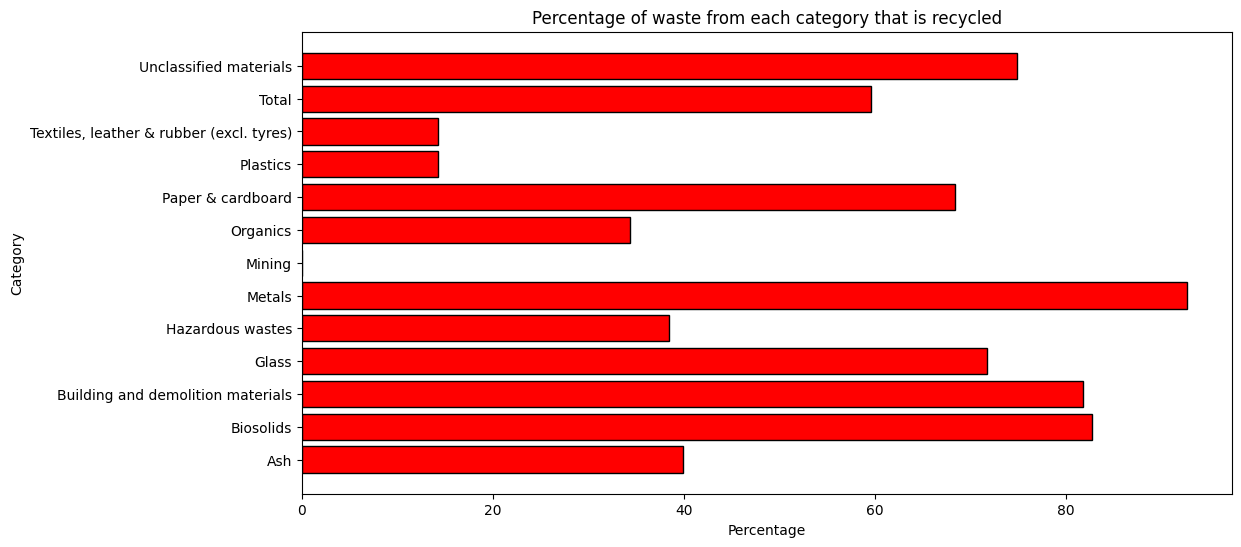

In [487]:
plt.figure(figsize=(12, 6))
plt.barh(unique_categories, percs, color = 'red', edgecolor='black', linewidth=1)
plt.xlabel("Percentage")
plt.ylabel("Category")
plt.title("Percentage of waste from each category that is recycled")
plt.show()

In [510]:
df[df['Category'] == 'Mining'][df['Year'] == '2020-2021']['Tonnes'].drop_duplicates().sum()

C:\Users\macka\AppData\Local\Temp\ipykernel_29360\1135159840.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Category'] == 'Mining'][df['Year'] == '2020-2021']['Tonnes'].drop_duplicates().sum()


619676410